In [1]:
import numpy as np
from scipy.stats import pearsonr
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks')

/home/camila/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# load train, test, and dev sets
data_x = np.load('data_x.npy')
data_y = np.load('data_y.npy')

In [116]:
data_x.shape

(4208, 135)

In [117]:
data_y.shape

(4208, 1)

In [3]:
X_data, X_test, y_data, y_test = train_test_split(data_x, data_y, test_size=0.15, random_state=7)
X_train, X_dev, y_train, y_dev = train_test_split(X_data, y_data, test_size=0.15, random_state=7)

k_fold = KFold(n_splits=10)
dot_size = 7

In [4]:
# pre-processing data: transforming each feature to have zero mean and unit variance. To avoid risk analysis
# being skewed by certain features dominating the variance.
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_dev = scaler.transform(X_dev)

In [120]:
print(X_train.shape)
print(X_test.shape)
print(X_dev.shape)

(3039, 135)
(632, 135)
(537, 135)


In [147]:
# 1) Ridge Regression
print("LINEAR RIDGE REGRESSION")
lr_clf = linear_model.Ridge(alpha=0.5).fit(X_train, y_train)
lr_pred = lr_clf.predict(X_train)

print("RMSE of LR (train set): ", np.sqrt(np.abs(mean_squared_error(y_train, lr_pred))))
print("Pearson of LR (train set): ", pearsonr(np.ravel(y_train), np.ravel(lr_pred)))
print("RMSE of LR on (test set): ", np.sqrt(np.abs(mean_squared_error(y_test, lr_clf.predict(X_test)))))
print("Pearson of LR (test set): ", pearsonr(np.ravel(y_test), np.ravel(lr_clf.predict(X_test))))

# CV
lr_scores = cross_val_score(lr_clf, X_train, np.ravel(y_train), cv=k_fold, scoring='neg_mean_squared_error')
print("Average of LR CV RMSE: ", np.sqrt(np.abs(lr_scores.mean())))
print("Standard deviation of LR on CV RMSE: ", np.sqrt(np.abs(lr_scores.std())))

LINEAR RIDGE REGRESSION
RMSE of LR (train set):  34.684029164144334
Pearson of LR (train set):  (0.8804211866059926, 0.0)
RMSE of LR on (test set):  42.293059656788714
Pearson of LR (test set):  (0.8423643042905299, 2.6964439268002933e-171)
Average of LR CV RMSE:  35.759973114807956
Standard deviation of LR on CV RMSE:  16.418844296000014


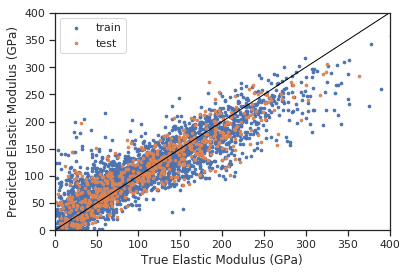

In [146]:
# Plot outputs
plt.scatter(y_train, lr_clf.predict(X_train), label='train', s=dot_size)
plt.scatter(y_test, lr_clf.predict(X_test), label='test', s=dot_size)
plt.plot([0, 400], [0, 400], color='black', linewidth=1)
plt.xlim([0, 400])
plt.ylim([0,400])
plt.xlabel('True Elastic Modulus (GPa)')
plt.ylabel('Predicted Elastic Modulus (GPa)')
# plt.title('Linear Regression')
plt.legend()
plt.savefig('Final_linearRegression.svg', dpi=600)
plt.show()

In [7]:
# 2) Random Forest Regressor
print("RF REGRESSOR")
rf_clf = RandomForestRegressor(n_estimators=100, oob_score=False, max_depth=15).fit(X_train, np.ravel(y_train))
rf_pred = rf_clf.predict(X_dev)

print("RMSE of RF (dev set): ", np.sqrt(np.abs(mean_squared_error(y_dev, rf_pred))))
print("Pearson of RF (dev set): ", pearsonr(np.ravel(y_dev), np.ravel(rf_pred)))
print("RMSE of RF on (test set): ", np.sqrt(np.abs(mean_squared_error(y_test, rf_clf.predict(X_test)))))
print("Pearson of RF (test set): ", pearsonr(np.ravel(y_test), np.ravel(rf_clf.predict(X_test))))

rf_scores = cross_val_score(rf_clf, X_train, np.ravel(y_train), cv=k_fold, scoring='neg_mean_squared_error')
print("Average of RF CV RMSE: ", np.sqrt(np.abs(rf_scores.mean())))
print("Standard deviation of RF on CV RMSE: ", np.sqrt(np.abs(rf_scores.std())))

RF REGRESSOR
RMSE of RF (dev set):  26.72416917872733
Pearson of RF (dev set):  (0.9317606425363425, 1.4621368152961828e-237)
RMSE of RF on (test set):  37.34862806163357
Pearson of RF (test set):  (0.8822891547633231, 2.4528944487808376e-208)
Average of RF CV RMSE:  31.558392196193118
Standard deviation of RF on CV RMSE:  15.955109422780325


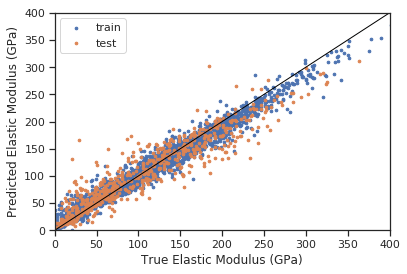

In [124]:
# Plot outputs
plt.scatter(y_train, rf_clf.predict(X_train), label='train', s=dot_size)
plt.scatter(y_test, rf_clf.predict(X_test), label='test', s=dot_size)
plt.plot([0, 400], [0, 400], color='black', linewidth=1)
plt.xlim([0, 400])
plt.ylim([0,400])
plt.xlabel('True Elastic Modulus (GPa)')
plt.ylabel('Predicted Elastic Modulus (GPa)')
# plt.title('Random Forest Regressor')
plt.legend()
plt.savefig('Final_RandomForestRegressor.svg', dpi=600)
plt.show()

In [5]:
# 3) MLP
print("MLP")
nn_clf = MLPRegressor(solver='sgd', activation='relu', early_stopping=False).fit(X_train, np.ravel(y_train))
nn_pred = nn_clf.predict(X_dev)

print("RMSE of RF (dev set): ", np.sqrt(np.abs(mean_squared_error(y_dev, nn_pred))))
print("Pearson of NN (dev set): ", pearsonr(np.ravel(y_dev), np.ravel(nn_pred)))
print("RMSE of RF (test set): ", np.sqrt(np.abs(mean_squared_error(y_test, nn_clf.predict(X_test)))))
print("Pearson of NN (test set): ", pearsonr(np.ravel(y_test), np.ravel(nn_clf.predict(X_test))))

nn_scores = cross_val_score(nn_clf, X_train, np.ravel(y_train), cv=k_fold, scoring='neg_mean_squared_error')
print("Average of RF CV RMSE: ", np.sqrt(np.abs(nn_scores.mean())))
print("Standard deviation of RF on CV RMSE: ", np.sqrt(np.abs(nn_scores.std())))

MLP
RMSE of RF (dev set):  30.063515202336514
Pearson of NN (dev set):  (0.9108783515924611, 8.477760619637613e-208)
RMSE of RF (test set):  37.87245325670491
Pearson of NN (test set):  (0.8758607147866533, 1.581430435676624e-201)
Average of RF CV RMSE:  31.263447050491173
Standard deviation of RF on CV RMSE:  16.02968600170069


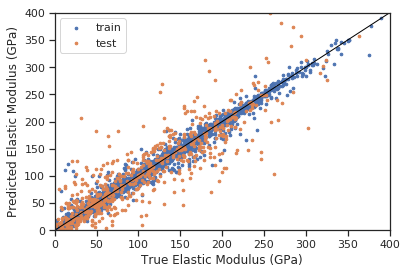

In [126]:
# Plot outputs
plt.scatter(y_train, nn_clf.predict(X_train), label='train', s=dot_size)
plt.scatter(y_test, nn_clf.predict(X_test), label='test', s=dot_size)
plt.plot([0, 400], [0, 400], color='black', linewidth=1)
plt.xlim([0, 400])
plt.ylim([0,400])
plt.xlabel('True Elastic Modulus (GPa)')
plt.ylabel('Predicted Elastic Modulus (GPa)')
# plt.title('MLP Regressor')
plt.legend()
plt.savefig('Final_MLP_relu.svg', dpi=600)
plt.show()